# EDA Spotify Dataset


In [1]:
# imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [2]:
# Load data set

df = pd.read_csv('spotify_dataset.csv')

df.head()

,song_name,artist,album,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,song_popularity,artist_genres,artist_popularity,artist_followers,release_year
0,Matador,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,0.851,0.843,11,-3.634,0,0.0447,0.2550,0.000667,0.1630,0.964,96.034,197120,44,['cumbia villera'],45,68434,2007
1,Matador - Remasterizado 2008,Los Fabulosos Cadillacs,Vasos Vacíos,0.543,0.962,4,-5.337,0,0.1060,0.0274,0.027000,0.0900,0.639,193.660,275893,60,"['argentine rock', ' latin alternative', ' lat...",67,2633939,1993
2,El Campanero,Onda Sabanera,Lluvia de Exitos/Cumbia Hasta las Manos,0.595,0.749,7,-6.627,1,0.0702,0.0216,0.000000,0.2440,0.888,192.579,283333,46,['cumbia villera'],45,68434,2007
3,Chacarera Del Sufrido,Raly Barrionuevo,El Sueño De Los Viajeros,0.682,0.629,4,-10.538,1,0.1280,0.4970,0.000028,0.4260,0.696,78.749,155933,43,"['argentine rock', ' folclore santiagueno', ' ...",51,169413,2015
4,Cacique Yatel,Rubén Patagonia,La Historia - 2da Parte,0.543,0.557,9,-8.672,0,0.0908,0.3830,0.000010,0.0837,0.401,81.926,233800,30,['folklore argentino'],25,5212,2006


## Data Cleaning

In [3]:
# Check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   song_name          291 non-null    object 
 1   artist             291 non-null    object 
 2   album              291 non-null    object 
 3   danceability       291 non-null    float64
 4   energy             291 non-null    float64
 5   key                291 non-null    int64  
 6   loudness           291 non-null    float64
 7   mode               291 non-null    int64  
 8   speechiness        291 non-null    float64
 9   acousticness       291 non-null    float64
 10  instrumentalness   291 non-null    float64
 11  liveness           291 non-null    float64
 12  valence            291 non-null    float64
 13  tempo              291 non-null    float64
 14  duration_ms        291 non-null    int64  
 15  song_popularity    291 non-null    int64  
 16  artist_genres      291 non

There is not missing data.

However, the artist_genres colum stores a list of the genres associated to an artist.

In [5]:
numeric_columns= ['danceability',
                   'energy',
                   'key',
                    'loudness',
                    'mode',
                    'speechiness',
                    'acousticness',
                    'instrumentalness',
                    'liveness',
                    'valence',
                    'tempo',
                    'duration_ms',
                    'song_popularity',
                    'artist_popularity',
                    'artist_followers',
                    'release_year']

cathegorical_columns = ['song_name',
                        'artist',
                        'album',
                        'artist_genres']

### Numeric Features

In this section, the aim is to understand the general distributions of the numeric features. 

Then, analyze whether there exist high correlation between some of them.

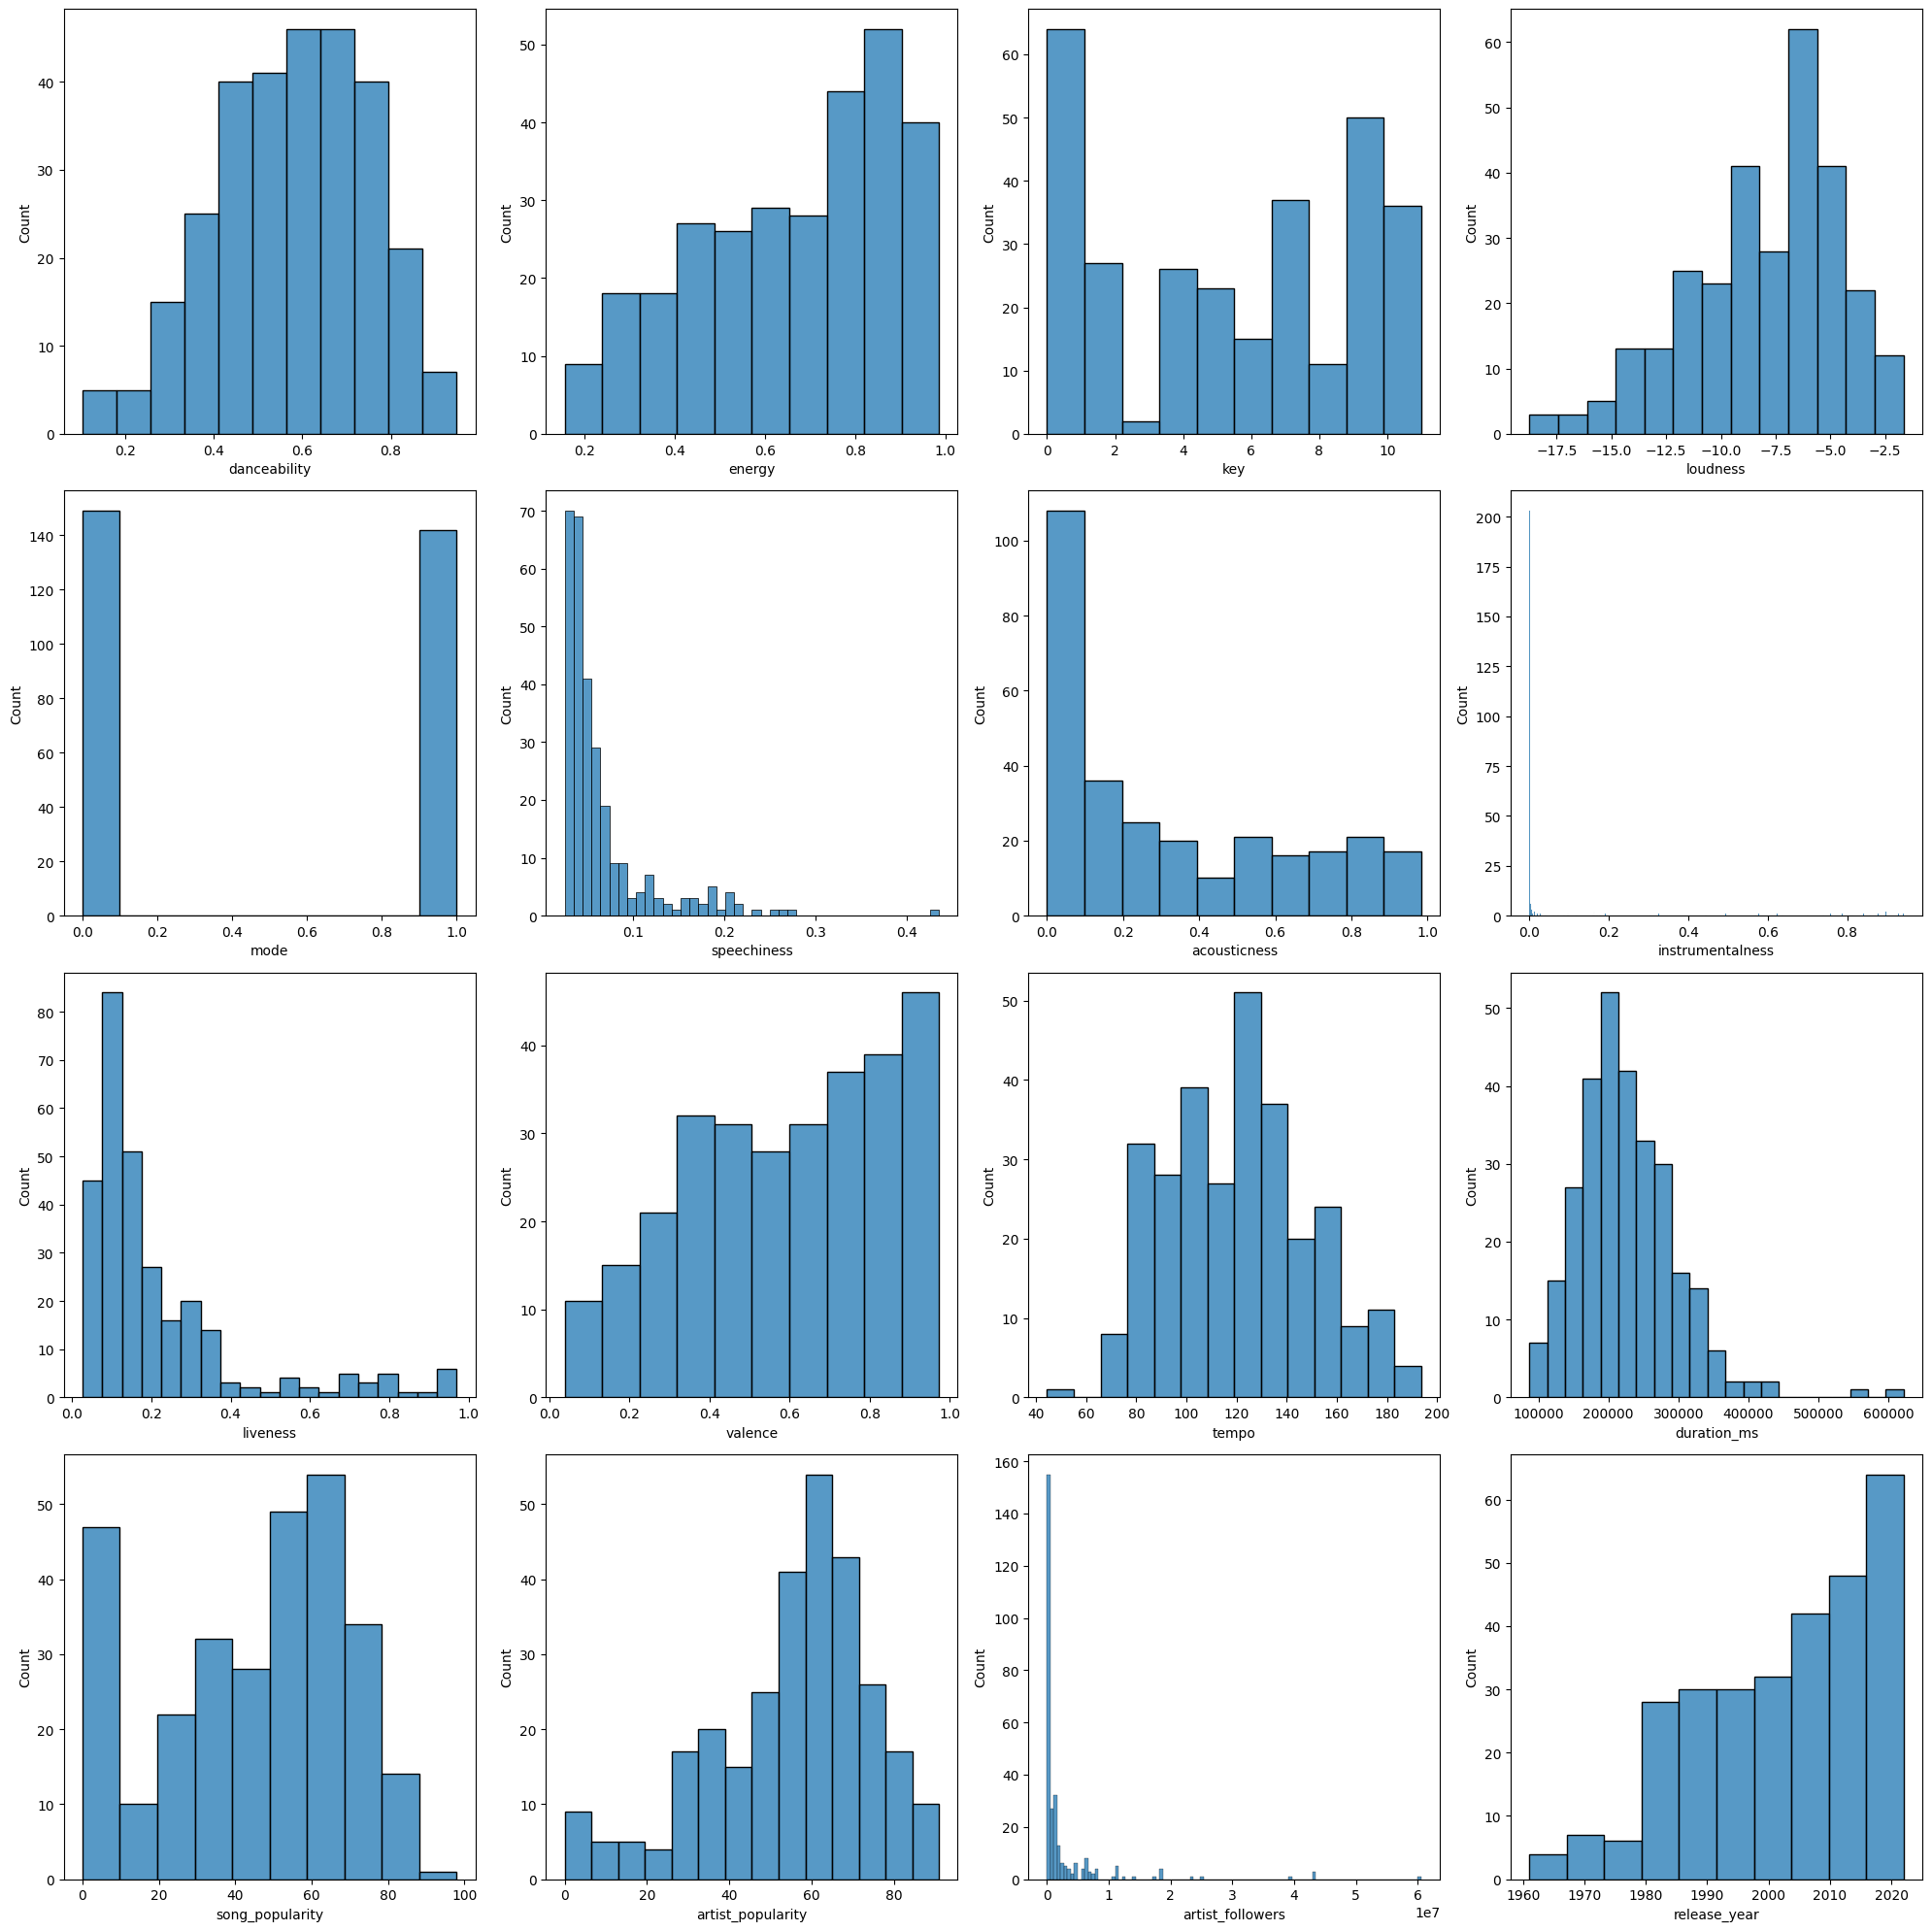

In [6]:
# Distributions

numeric_df = df[numeric_columns]

# Plot the distributions of the numeric columns
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(numeric_df.columns):
    sns.histplot(numeric_df[col], ax=ax[i])
    ax[i].set_xlabel(col)

plt.tight_layout()
plt.show()

From the above, some observations can be made:

1. Danceability presents an almost gaussian distribution
2. The most common Loudness level is around -7.5 to -5 db
3. Most songs present a tempo around 120bpm. This is a very common pulse, even most of DAWs consider this tempo as the default value.
4. Most songs have a duration of around 200000ms, which represents approximately 3.5 mins.
5. The most common popularity score for both, artists and songs, is around 60%
6. More and songs are released over time. This is align with the availavility of equipment to create home studios, which enable artist to create from their homes.


#### Correlations

A straight forward approach to detect high correlation among the features is to use the Pearson correlation.

We can double test the conclusion achieved by the mentioned approach by using and scatterplot matrix. The represetation will allow us to detect linear relations between two variables.

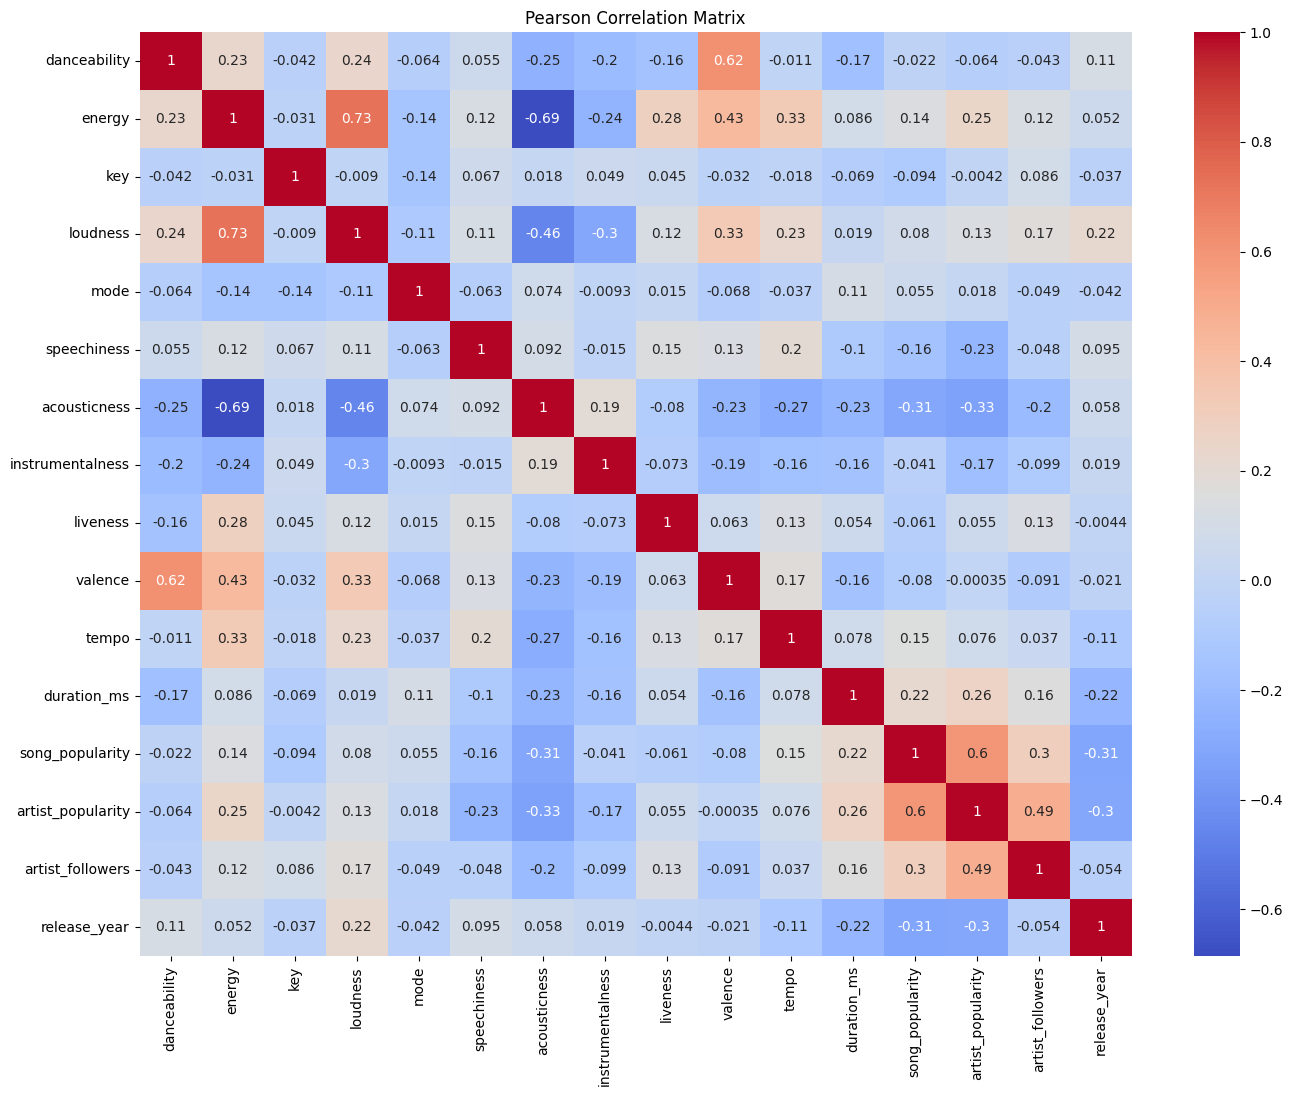

In [7]:
# Create a heatmap of the Pearson correlation matrix
corr = numeric_df.corr(method='pearson')
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

There are some correlations to analyze:

1. Energy - Loudness: In general music with higher loudness levels are associated to music with higher energy. This observation is coherent from a musical perspective. A metal song aims to achieve a powerful and impactful sound, leading to higher loudness levels. Otherwise, a more melacholic song aims for softer sounds and slow transitions, then it benefits from lower loudness levels.

2. Danceability - valence: Valence is a complex variable developed in the field of Music information retrieval and, in its more basic meaning, it is associated to the happiness projected by a song. Then, it is coherent that most happy songs are associated to dance.

3. Popularity: It is exprected that popular artist are popular because people enjoy listening to their songs, so a popular artist is supposed to have popular songs and more followers than less popular artists.


Let's use the Scatterplot to further explore this relations...

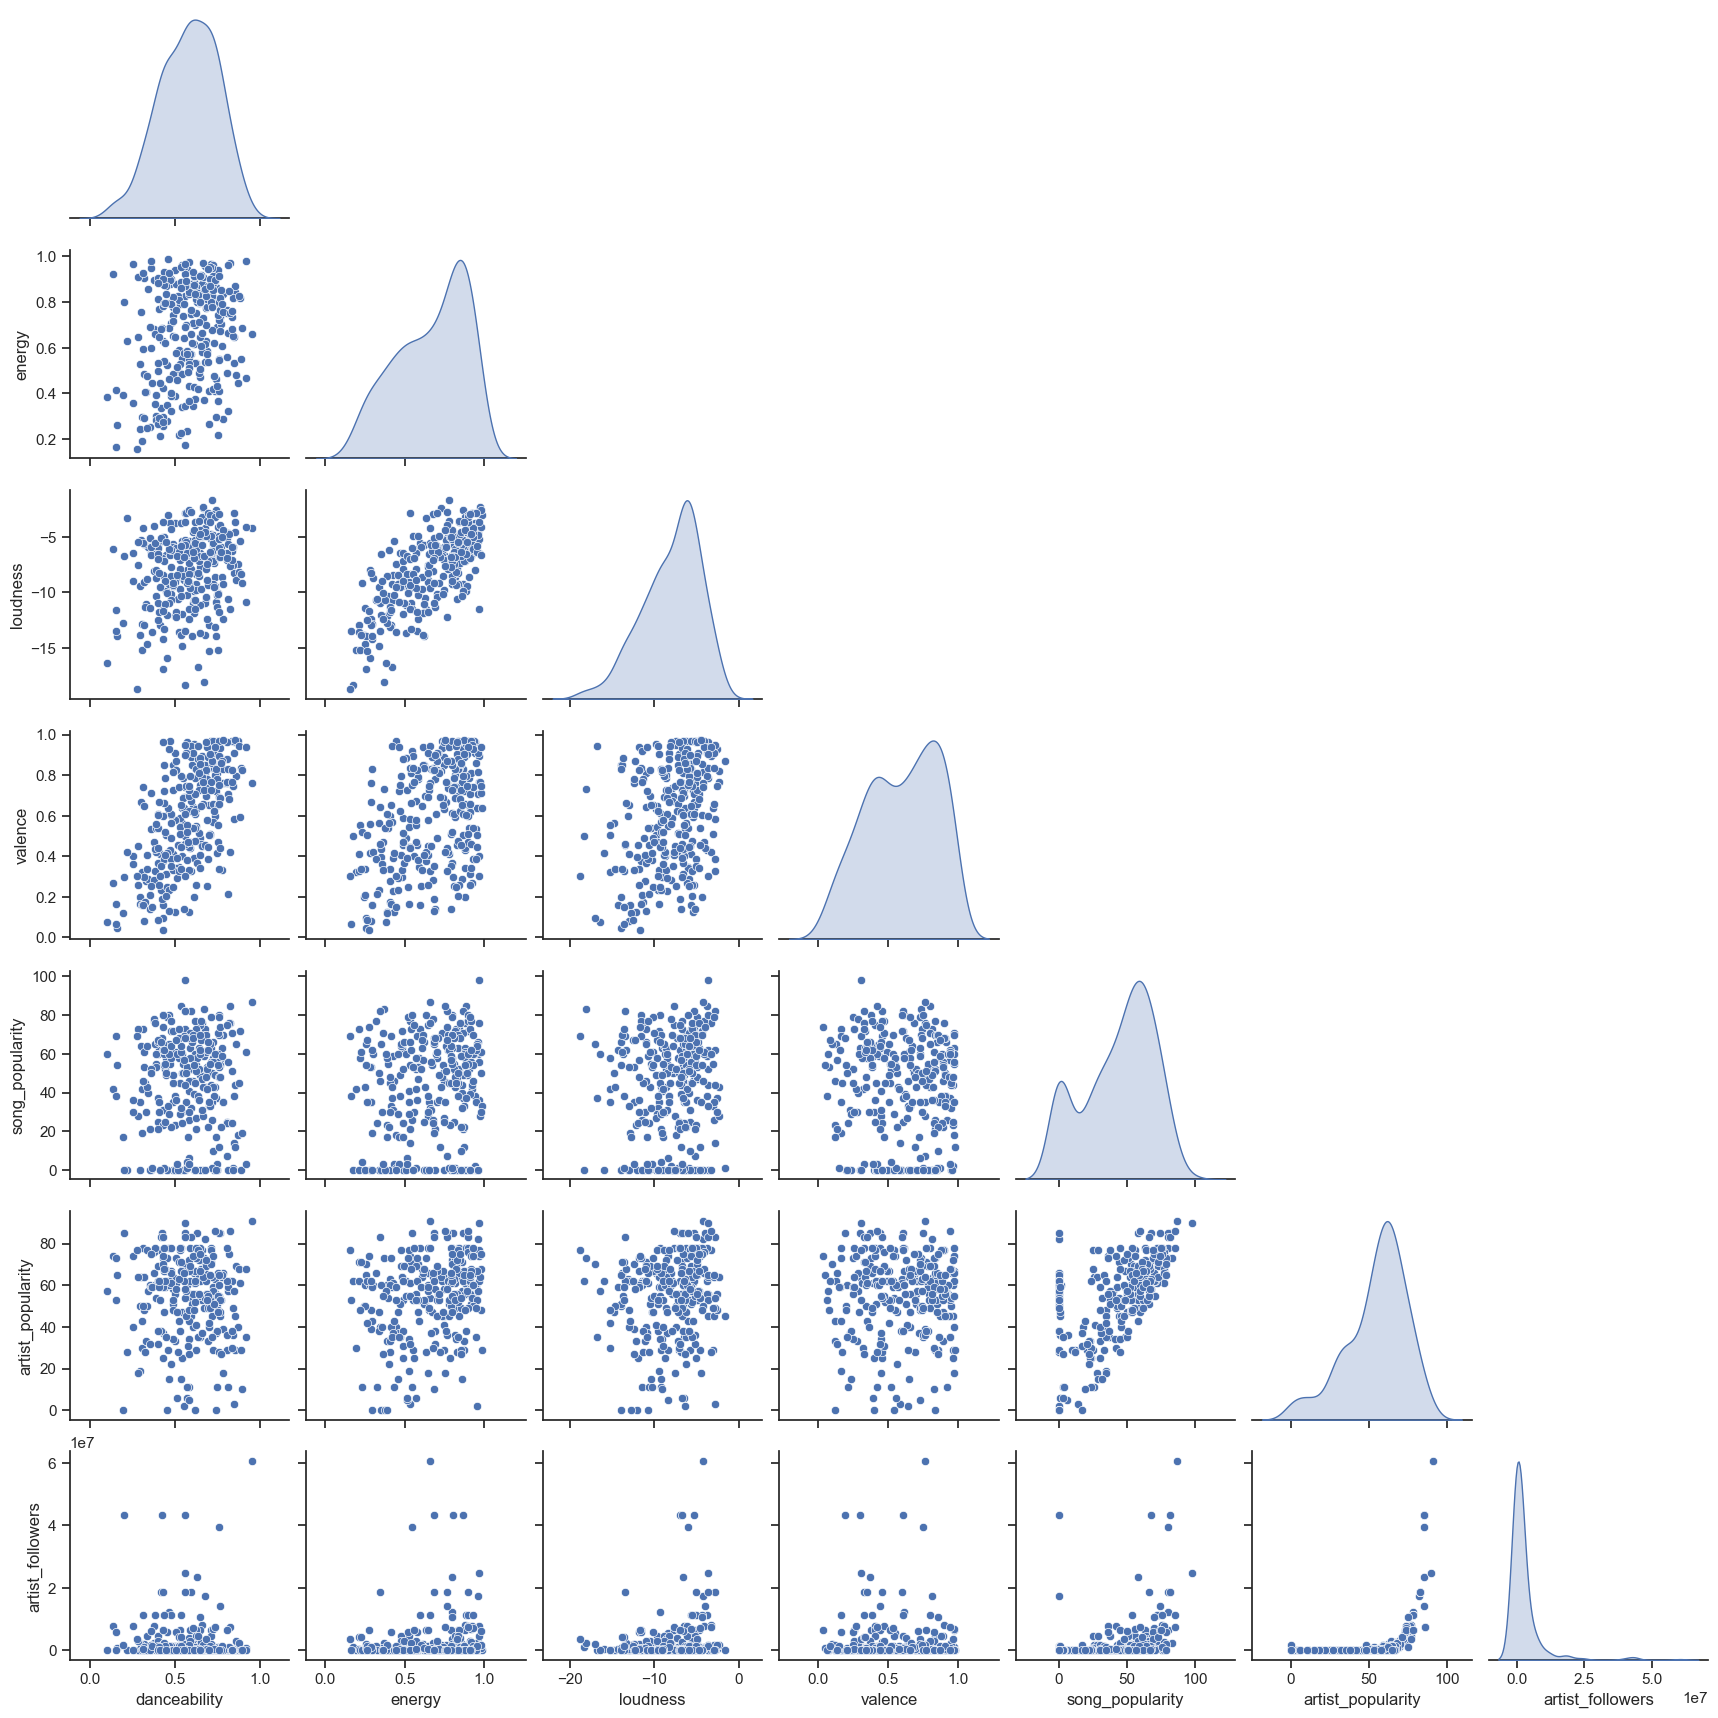

In [10]:
# Create a scatterplot matrix
columns2 = ['danceability',
                   'energy',
                    'loudness',
                    'valence',
                    'song_popularity',
                    'artist_popularity',
                    'artist_followers']



sns.set_theme(style='ticks', color_codes=True)
sns.pairplot(numeric_df[columns2], diag_kind='kde', corner=True)
plt.show()

From this second analysis, we can identify that:

1. The only potentially linear relationships is between loudness and energy, as explained above.
2. Artist followers grow rapidly when the artist is above the 60% popularity, i.e, when it is above the mean popularity.

#### Cathegorical Features

#### Genres

The most relevant cathegorical feature in my personal opinion is the genres associated to the artist.

First of all, it is important to understand if the dataset is very diverse regarding the genres and how specific are those labels. It's not the same to have songs from metal, pop, reggaeton, trap and classical than dataset with subgenres of rock, because the closer the genres, the more suble are their differences and to identify othe group from the other based on numeric static features gets harder. 

In [13]:
import ast


# Create an empty list to store all the genres
all_genres = []

# Iterate over each row in the dataset
for index, row in df.iterrows():
    # Convert the string to a list of genres
    genre_list = ast.literal_eval(row['artist_genres'])
    # Iterate over each genre in the list and add it to the all_genres list
    for genre in genre_list:
        if genre not in all_genres:
            all_genres.append(genre)

# Print the list of all genres
print(all_genres)
print(len(all_genres))

['cumbia villera', 'argentine rock', ' latin alternative', ' latin rock', ' rock en espanol', ' ska argentino', ' folclore santiagueno', ' folklore argentino', ' rock nacional', 'folklore argentino', ' folclore salteno', 'orquesta tipica', ' tango', ' vintage tango', 'latin classical', ' cantautor', ' trova', 'chamame', ' folclore tucumano', ' zamba', 'argentine heavy metal', ' argentine metal', ' argentine rock', ' latin metal', '[]', ' post-punk argentina', 'cumbia andina mexicana', ' folclore jujeno', 'latin pop', ' modern salsa', ' salsa', ' tropical', 'dominican pop', ' merengue', ' rumba', ' spanish pop', ' spanish pop rock', ' musica andina chilena', ' nueva cancion', 'hi-nrg', ' new romantic', ' new wave', ' new wave pop', ' synthpop', 'arrocha', ' sertanejo', ' sertanejo universitario', 'cumbia boliviana', 'flamenco', ' world', 'classic country pop', ' country', ' country dawn', 'operatic pop', 'broadway', ' show tunes', ' west end', 'show tunes', ' hollywood', 'british invasi

#### More Frequent Genres

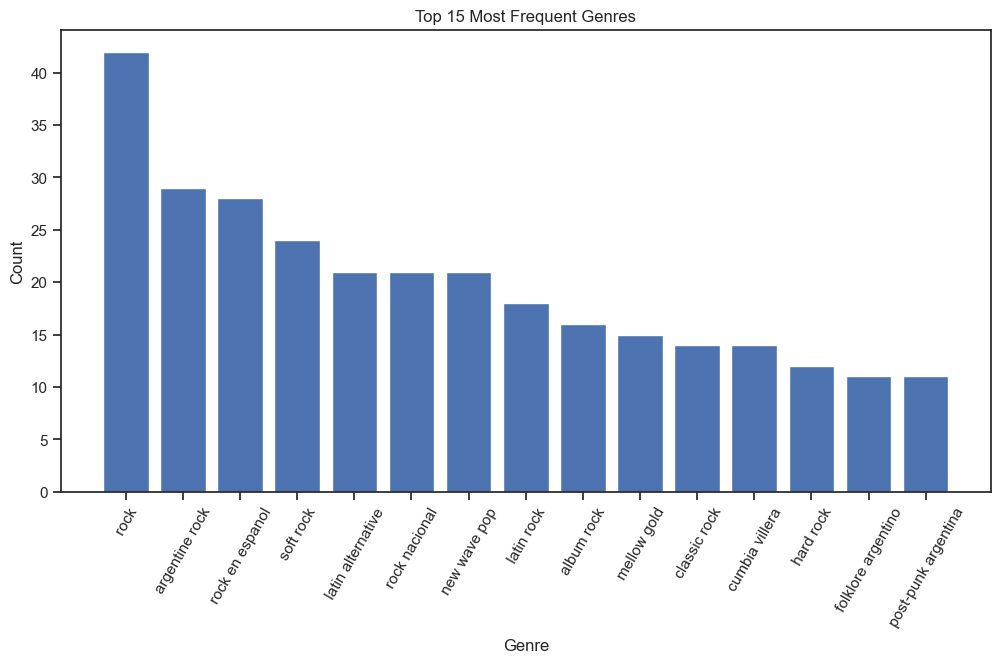

In [28]:

# Create an empty dictionary to store the genre counts
genre_counts = {}

# Iterate over each row in the dataset
for index, row in df.iterrows():
    # Convert the string to a list of genres
    genre_list = ast.literal_eval(row['artist_genres'])
    if genre_list == '[]':
        continue # Skip empty lists
    # Iterate over each genre in the list and update the genre counts
    for genre in genre_list:
        if genre != '[]' :
            if genre in genre_counts:
                genre_counts[genre] += 1
            else:
                genre_counts[genre] = 1

# Sort the genre counts in descending order
sorted_genre_counts = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

# Create a list of the top 15 most frequent genres and their counts
top_genres = [x[0] for x in sorted_genre_counts[:15]]
top_counts = [x[1] for x in sorted_genre_counts[:15]]

# Create a bar plot of the top 15 most frequent genres
plt.figure(figsize=(12, 6))
plt.bar(top_genres, top_counts)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 15 Most Frequent Genres')
plt.xticks(rotation=60)
plt.show()

#### Most popular genres

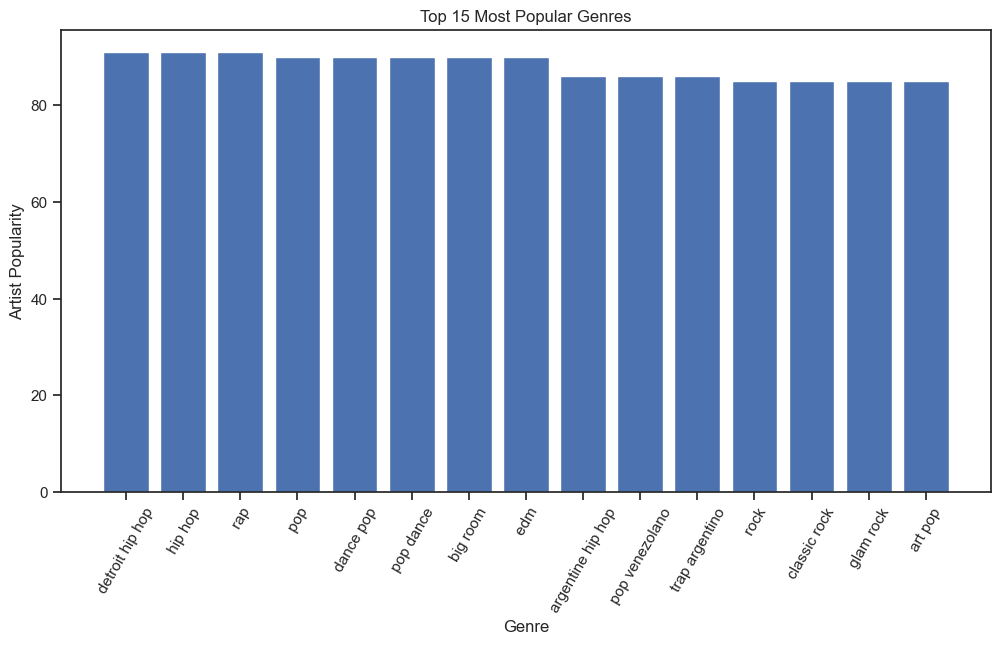

In [30]:

# Create a dictionary to store the highest artist popularity for each genre
genre_popularity = {}

# Iterate over each row in the dataset
for index, row in df.iterrows():
    # Convert the string to a list of genres
    genre_list = ast.literal_eval(row['artist_genres'])
    if genre_list == []:
        continue # Skip empty lists
    # Update the highest artist popularity for each genre
    for genre in genre_list:
        if genre not in genre_popularity:
            genre_popularity[genre] = row['artist_popularity']
        else:
            genre_popularity[genre] = max(genre_popularity[genre], row['artist_popularity'])

# Sort the genre popularity in descending order
sorted_genre_popularity = sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)

# Create a list of the top 15 most popular genres and their popularity scores
top_genres = [x[0] for x in sorted_genre_popularity[:15]]
top_popularity = [x[1] for x in sorted_genre_popularity[:15]]

# Create a bar plot of the top 15 most popular genres
plt.figure(figsize=(12, 6))
plt.bar(top_genres, top_popularity)
plt.xlabel('Genre')
plt.ylabel('Artist Popularity')
plt.title('Top 15 Most Popular Genres')
plt.xticks(rotation=60)
plt.show()

## Triggering Questions

1. Top 5 most popular artist
2. Top 5 loudest tracks

In [39]:
# Sort the dataset by artist_popularity in descending order and select the top 10 rows
top_artists = df.sort_values(by='artist_popularity', ascending=False)
top_artists = top_artists['artist'].unique()
# Print the top 10 artists
print(top_artists[:10])

['Eminem' 'David Guetta' 'Bizarrap' 'Farruko' 'Shawn Mendes' 'Lady Gaga'
 'Queen' 'Red Hot Chili Peppers' 'Gusttavo Lima' 'Madonna']


#### 2. Top 5 loudest tracks

Surprisingly, any of the top 5 loudest tracks belongs to a metal music label

In [21]:
top_five_loudest_track = df[['loudness','song_name','artist_genres']].sort_values(by='loudness', ascending=False)
top_five_loudest_track.head(5)

,loudness,song_name,artist_genres
217,-1.657,Amor de la Salada,['cumbia pop']
180,-2.313,She Works Hard for the Money - Live,"['dance pop', ' disco', ' hi-nrg', ' new wave ..."
81,-2.392,Los Dueños de Pabellon,"['cumbia 420', ' cumbia villera']"
6,-2.547,El Humahuaqueño / Carnavalito Quebradeño,"['argentine rock', ' folclore salteno', ' folk..."
241,-2.613,Casa Amarela [feat. Fred & Gustavo] - Ao Vivo,"['sertanejo', ' sertanejo pop', ' sertanejo un..."


#### 3. Average duration of the Most popular genres

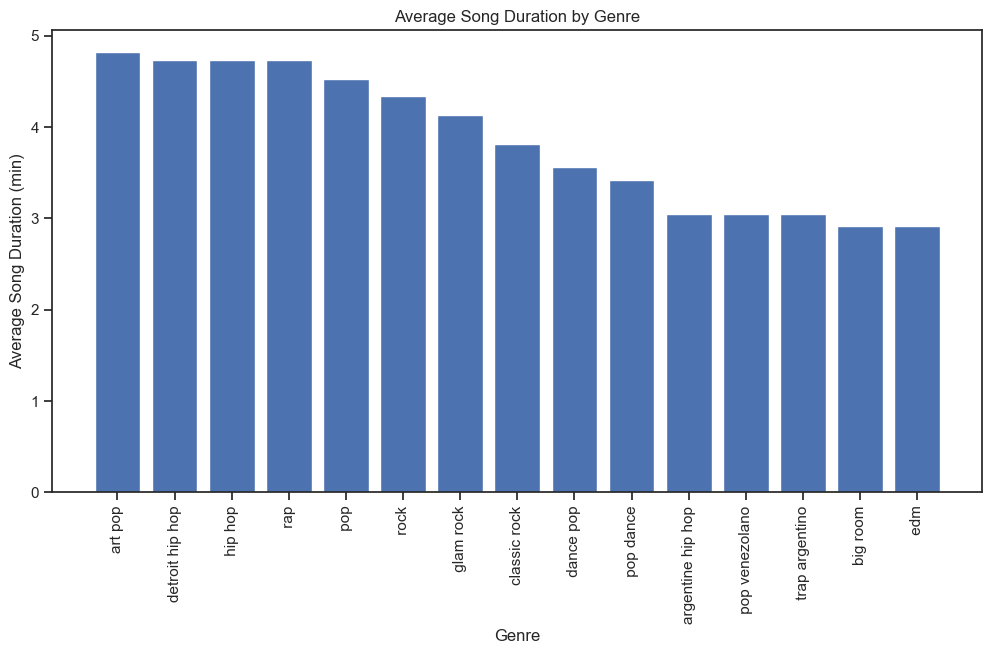

In [43]:

# Create a dictionary to store the highest artist popularity for each genre
genre_popularity = {}

# Iterate over each row in the dataset
for index, row in df.iterrows():
    # Convert the string to a list of genres
    genre_list = ast.literal_eval(row['artist_genres'])
    if genre_list == []:
        continue # Skip empty lists
    # Update the highest artist popularity for each genre
    for genre in genre_list:
        if genre not in genre_popularity:
            genre_popularity[genre] = row['artist_popularity']
        else:
            genre_popularity[genre] = max(genre_popularity[genre], row['artist_popularity'])

# Sort the genre popularity in descending order and select the top 15 genres
top_genres = [x[0] for x in sorted(genre_popularity.items(), key=lambda x: x[1], reverse=True)][:15]

# Calculate the average duration of the songs in the top 15 genres
genre_duration = {}
for index, row in df.iterrows():
    # Convert the string to a list of genres
    genre_list = ast.literal_eval(row['artist_genres'])
    if genre_list == []:
        continue # Skip empty lists
    # Check if any of the genres for this row are in the top 15 genres
    for genre in genre_list:
        if genre != '[]':
            if genre in top_genres:
                if genre not in genre_duration:
                    genre_duration[genre] = [row['duration_ms']]
                else:
                    genre_duration[genre].append(row['duration_ms'])

# Calculate the average duration for each genre
genre_avg_duration = {}
for genre, durations in genre_duration.items():
    genre_avg_duration[genre] = sum(durations) / len(durations)

# Sort the genre average duration in descending order
sorted_genre_avg_duration = sorted(genre_avg_duration.items(), key=lambda x: x[1], reverse=True)

# Create a bar plot of the genre average duration
plt.figure(figsize=(12, 6))
plt.bar([x[0] for x in sorted_genre_avg_duration], [(x[1]/60000) for x in sorted_genre_avg_duration])
plt.xlabel('Genre')
plt.ylabel('Average Song Duration (min)')
plt.title('Average Song Duration by Genre')
plt.xticks(rotation=90)
plt.show()